<a href="https://colab.research.google.com/github/abhirukth/Data-Sci.-File/blob/main/hand_gestures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import classification_report, confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emg-4/1.csv
/kaggle/input/emg-4/3.csv
/kaggle/input/emg-4/2.csv
/kaggle/input/emg-4/0.csv


In [ ]:
dfs = []

for i in ['0', '1', '2', '3']:
    dfs.append(pd.read_csv('../input/emg-4/' + i + '.csv'))

In [ ]:
for df in dfs:
    df.columns = list(range(len(df.columns)))

In [ ]:
dfs[2]

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-1.0,12.0,20.0,7.0,20.0,-73.0,-4.0,-2.0,4.0,5.0,...,-3.0,-5.0,-2.0,0.0,-4.0,-7.0,5.0,6.0,9.0,2
1,4.0,5.0,-8.0,-2.0,10.0,-10.0,-10.0,16.0,-3.0,-18.0,...,2.0,0.0,2.0,3.0,-8.0,19.0,20.0,0.0,-8.0,2
2,-3.0,-3.0,5.0,11.0,25.0,-20.0,-2.0,14.0,9.0,32.0,...,15.0,-2.0,16.0,6.0,9.0,1.0,31.0,16.0,4.0,2
3,-5.0,-9.0,-2.0,-5.0,-46.0,-34.0,-9.0,-4.0,0.0,8.0,...,-5.0,-11.0,-6.0,7.0,6.0,-10.0,-24.0,-6.0,0.0,2
4,3.0,-3.0,-6.0,-5.0,-3.0,-4.0,-5.0,-4.0,-5.0,8.0,...,-18.0,-14.0,8.0,1.0,-2.0,-4.0,-34.0,-3.0,6.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2937,1.0,-14.0,-5.0,-9.0,-10.0,4.0,-3.0,-4.0,3.0,4.0,...,22.0,8.0,28.0,-3.0,8.0,22.0,35.0,-1.0,-11.0,2
2938,-3.0,-8.0,-7.0,-7.0,-18.0,-49.0,-5.0,9.0,23.0,0.0,...,-8.0,8.0,17.0,9.0,-9.0,-1.0,-6.0,0.0,7.0,2
2939,-13.0,3.0,-4.0,-1.0,-7.0,15.0,-4.0,-6.0,-4.0,-9.0,...,6.0,-3.0,18.0,-2.0,-9.0,-11.0,-9.0,-4.0,22.0,2
2940,8.0,-24.0,-11.0,-7.0,21.0,23.0,0.0,6.0,-22.0,-10.0,...,-7.0,19.0,38.0,7.0,3.0,6.0,-5.0,-2.0,7.0,2


In [ ]:
data = pd.concat([df for df in dfs], axis = 0).reset_index(drop = True)

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
1,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
2,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
3,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0
4,15.0,-5.0,-5.0,-15.0,12.0,-22.0,-38.0,36.0,9.0,6.0,...,-26.0,5.0,6.0,6.0,11.0,5.0,30.0,-48.0,25.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11669,-3.0,-1.0,-1.0,-1.0,-28.0,20.0,5.0,0.0,-5.0,0.0,...,-3.0,1.0,4.0,3.0,4.0,-51.0,-49.0,5.0,-9.0,3
11670,-13.0,-5.0,-4.0,-3.0,-4.0,-24.0,-10.0,-8.0,20.0,9.0,...,6.0,-3.0,-3.0,-3.0,-5.0,-4.0,-45.0,-12.0,-15.0,3
11671,-1.0,-3.0,-1.0,1.0,30.0,38.0,-1.0,36.0,-10.0,1.0,...,14.0,-8.0,-4.0,-4.0,-4.0,-21.0,-29.0,-5.0,0.0,3
11672,1.0,4.0,4.0,5.0,9.0,-10.0,4.0,1.0,-2.0,-1.0,...,-16.0,-3.0,0.0,-3.0,-5.0,-36.0,-90.0,3.0,5.0,3


In [ ]:
print('Total missing values : ', data.isna().sum().sum())

Total missing values :  0


In [ ]:
y = data[64].copy()
X = data.drop(64, axis = 1).copy()

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

In [ ]:
X.shape

(11674, 64)

In [ ]:
inputs = tf.keras.Input(shape = (X.shape[1], ))
x = tf.keras.layers.Dense(1024, activation = 'relu')(inputs)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(512, activation = 'sigmoid')(x)
x = tf.keras.layers.Dropout(0.4)(x)
outputs = tf.keras.layers.Dense(4, activation = 'softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

batch_size = 32
epochs = 30

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = epochs,
    callbacks = [
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/30
205/205 [==============================] - 4s 13ms/step - loss: 1.1586 - accuracy: 0.4700 - val_loss: 0.3409 - val_accuracy: 0.8783
Epoch 2/30
205/205 [==============================] - 2s 10ms/step - loss: 0.3570 - accuracy: 0.8678 - val_loss: 0.2450 - val_accuracy: 0.9076
Epoch 3/30
205/205 [==============================] - 2s 10ms/step - loss: 0.2111 - accuracy: 0.9226 - val_loss: 0.2089 - val_accuracy: 0.9254
Epoch 4/30
205/205 [==============================] - 2s 10ms/step - loss: 0.1690 - accuracy: 0.9425 - val_loss: 0.1944 - val_accuracy: 0.9291
Epoch 5/30
205/205 [==============================] - 2s 10ms/step - loss: 0.1166 - accuracy: 0.9575 - val_loss: 0.1957 - val_accuracy: 0.9401
Epoch 6/30
205/205 [==============================] - 2s 10ms/step - loss: 0.0992 - accuracy: 0.9659 - val_loss: 0.2086 - val_accuracy: 0.9394
Epoch 7/30
205/205 [==============================] - 2s 11ms/step - loss: 0.0910 - accuracy: 0.9672 - val_loss: 0.2164 - val_accuracy: 0.9284

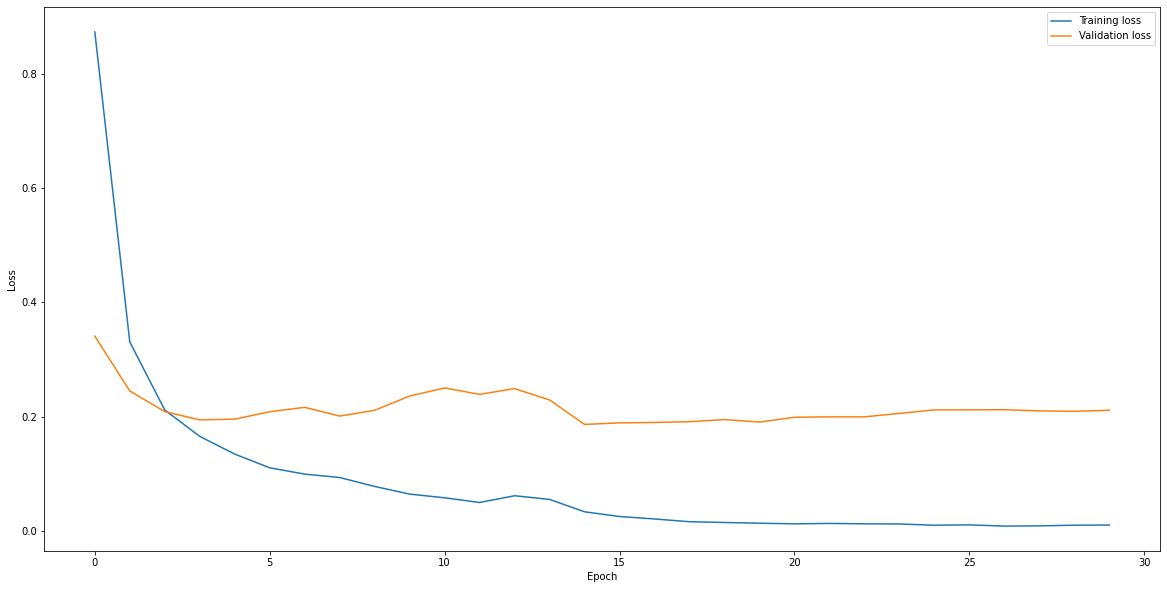

In [ ]:
plt.figure(figsize = (20, 10))

plt.plot(range(epochs), history.history['loss'], label = 'Training loss')
plt.plot(range(epochs), history.history['val_loss'], label = 'Validation loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model.evaluate(X_test, y_test)

110/110 [==============================] - 0s 3ms/step - loss: 0.1879 - accuracy: 0.9552


[0.18789543211460114, 0.9551813006401062]

In [ ]:
y_true = np.array(y_test)
y_pred = np.array(list(map(lambda x : np.argmax(x), model.predict(X_test))))

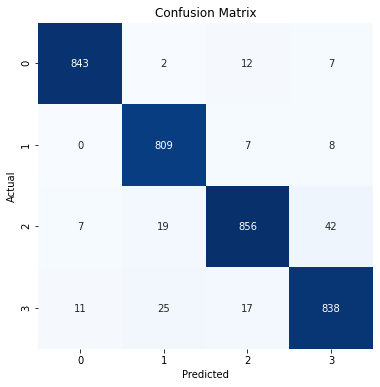

In [ ]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize = (6, 6))
sns.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       864
           1       0.95      0.98      0.96       824
           2       0.96      0.93      0.94       924
           3       0.94      0.94      0.94       891

    accuracy                           0.96      3503
   macro avg       0.96      0.96      0.96      3503
weighted avg       0.96      0.96      0.96      3503

